In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
from os import path
from diracgan.gans import *
from diracgan.simulate import *
from diracgan.plotting import *
from diracgan.subplots import *

In [2]:
h = 0.2
theta0 = 1.
psi0 = 1.
theta_s = np.linspace(-2, 2., 10)
psi_s = np.linspace(-2, 2, 10)

plot_configs = [
    (GAN(), 'gan', h, h, 500),
    (NSGAN(), 'nsgan', h, h, 500),
    (WGAN(1.), 'wgan', h, h, 500),
    (WGAN_GP(0.7, 1.), 'wgan_gp', h, h, 500),
    (GAN_InstNoise(0.7), 'gan_instnoise', h, h, 500),
    (GAN_GradPenalty(0.3), 'gan_gradpen',h ,h, 500),
    (GAN_GradPenalty(1.), 'gan_gradpen_critical',h ,h, 500),
    (GAN_Consensus(1.), 'gan_consensus', h, h, 500),
    (NSGAN_GradPenalty(0.3), 'nsgan_gradpen', h, h, 500),
]

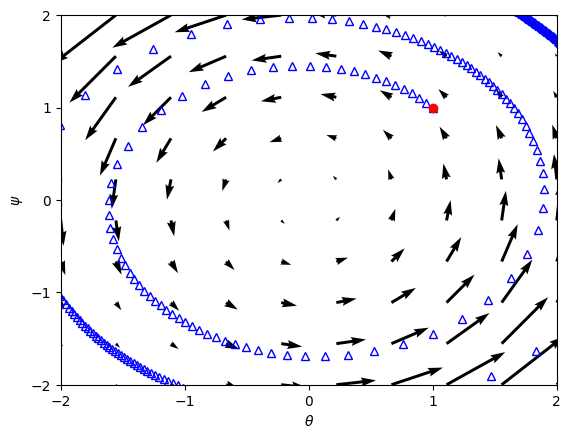

100%|██████████| 299/299 [00:41<00:00,  7.13it/s]


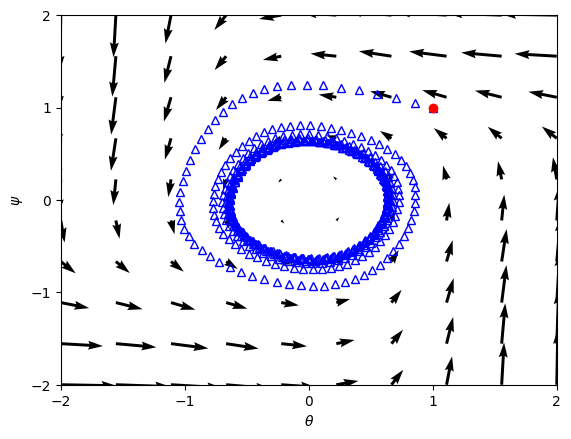

100%|██████████| 299/299 [00:45<00:00,  6.64it/s]


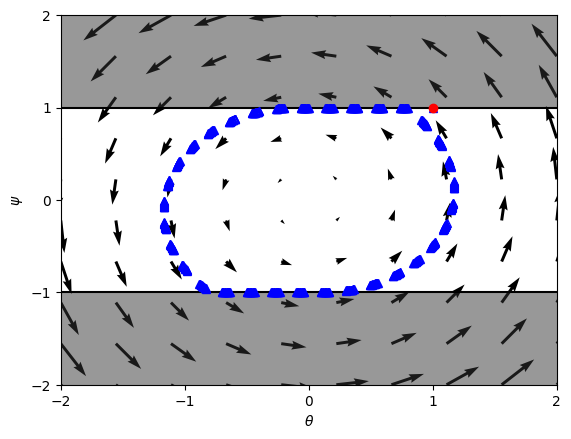

100%|██████████| 299/299 [00:46<00:00,  6.37it/s]


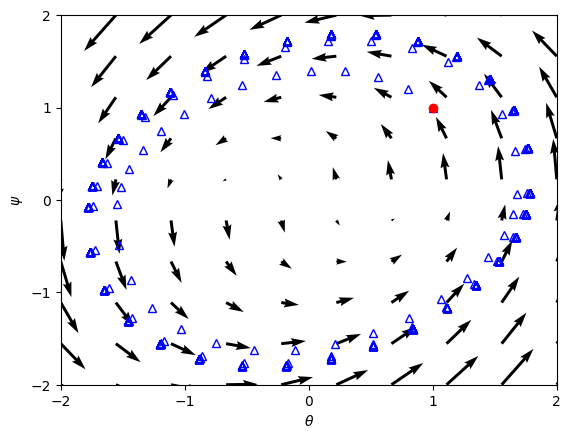

100%|██████████| 299/299 [01:12<00:00,  4.14it/s]


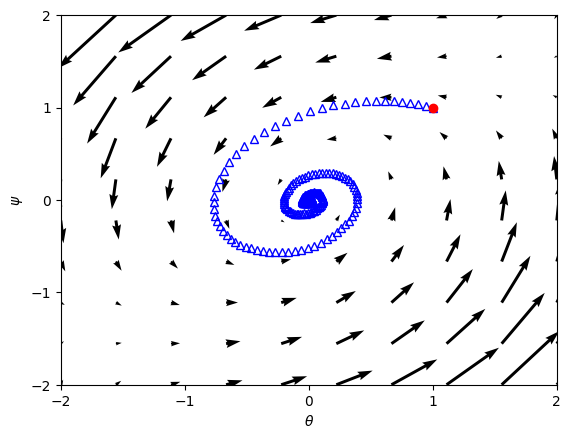

100%|██████████| 299/299 [00:53<00:00,  5.54it/s]


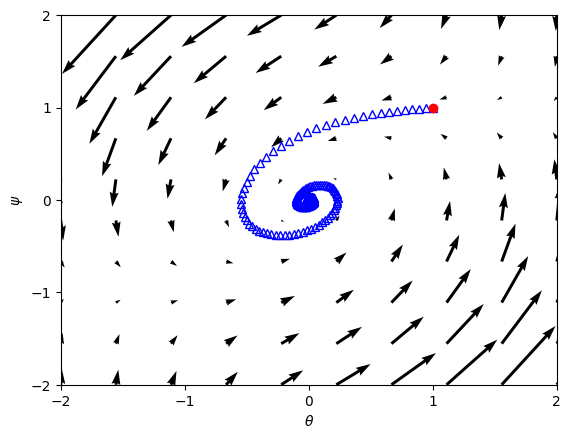

100%|██████████| 299/299 [00:42<00:00,  7.04it/s]


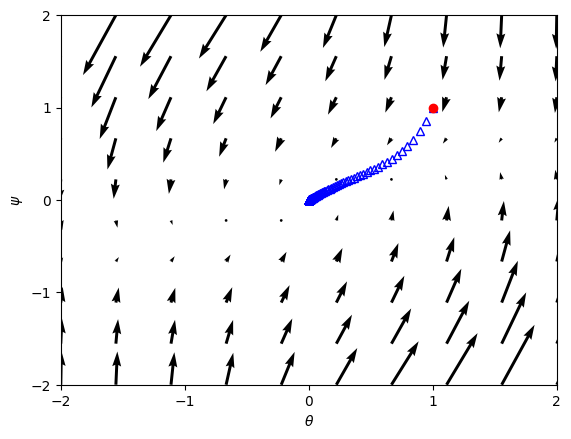

100%|██████████| 299/299 [00:39<00:00,  7.64it/s]


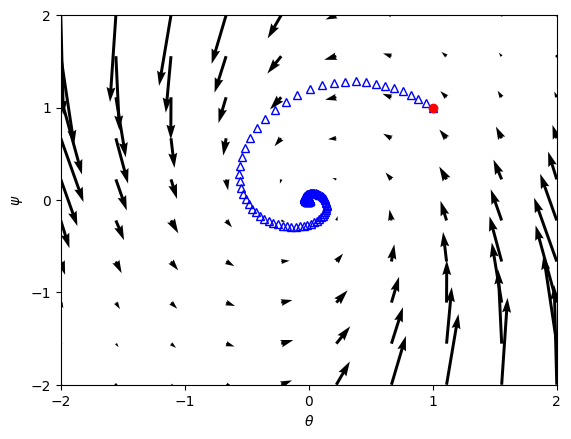

100%|██████████| 299/299 [00:41<00:00,  7.27it/s]


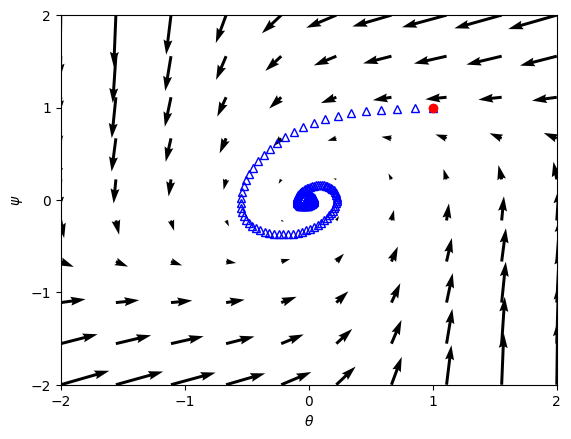

100%|██████████| 299/299 [00:47<00:00,  6.36it/s]


In [3]:
outfolder = './out/simgd'
if not path.exists(outfolder):
    os.makedirs(outfolder)
        
for gan, outfile, hs_g, hs_d, nsteps in plot_configs:
    trajectory = trajectory_simgd(gan, theta0, psi0, hs_g=hs_g, hs_d=hs_d, nsteps=500)
    plot_vector(gan, theta_s, psi_s, path.join(outfolder, '%s.png' % outfile), trajectory)
    simulate_trajectories(gan, theta_s, psi_s, trajectory, path.join(outfolder, 'animations', outfile))